# Understanding the Data

In [582]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

df = pd.read_csv('data/marketing_campaign.csv', delimiter='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [584]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [585]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [586]:
df = df.dropna(subset=['Income'])

In [587]:
df['Income'].describe()
df = df[df['Income'] < 600000]

In [588]:
unique_education = df['Education'].unique()
print(unique_education)
print(df['Education'].value_counts())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Education
Graduation    1115
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


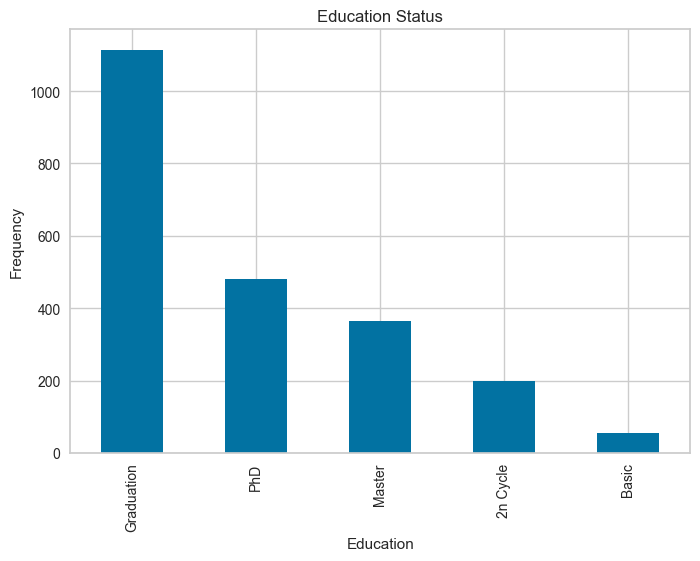

In [589]:
df['Education'].value_counts().plot(kind='bar', title='Education Status')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

In [590]:
unique_marital_status = df['Marital_Status'].unique()
print(unique_marital_status)
print(df['Marital_Status'].value_counts())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Marital_Status
Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


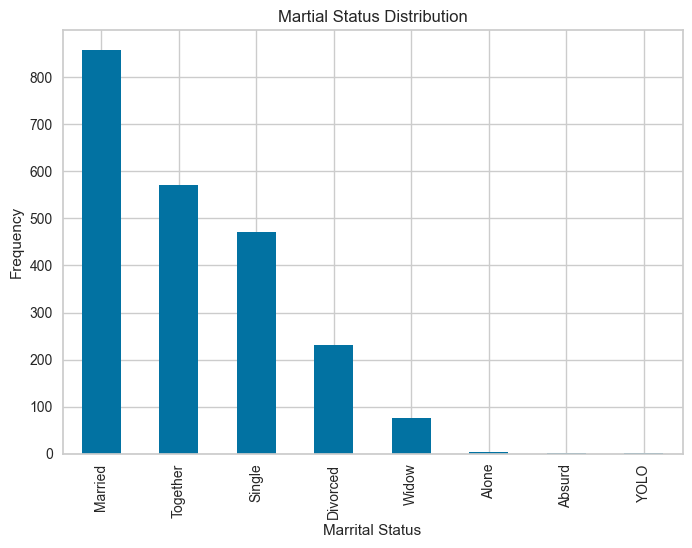

In [591]:
df['Marital_Status'].value_counts().plot(kind='bar', title='Martial Status Distribution')
plt.xlabel('Marrital Status')
plt.ylabel('Frequency')
plt.show()

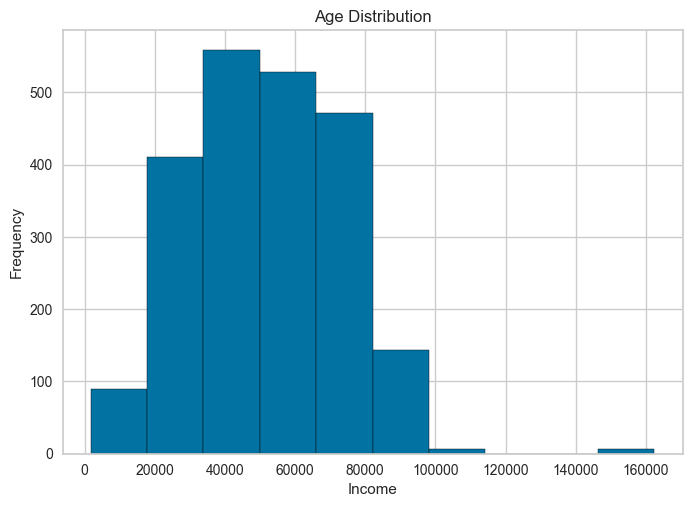

In [592]:
df['Income'].plot(kind='hist', bins=10, edgecolor='black', title='Age Distribution')
plt.xlabel('Income')
plt.show()

# Feature Engineering / Normalization

Get Customer_For feature = Calculates customer loyalty from 2021 to first sign up.


In [593]:
# Convert "Dt_Customer" to datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

# Get the dates of the newest and oldest recorded customer
# Manually set max_date to January 1, 2021
max_date = pd.to_datetime("2021-01-01")
min_date = df["Dt_Customer"].min()

print("The newest customer's enrollment date in the records:", max_date)
print("The oldest customer's enrollment date in the records:", min_date)

# Create the feature "Customer_For" (number of days since enrollment)
df["Customer_For"] = (max_date - df["Dt_Customer"]).dt.days

df['Customer_For']

The newest customer's enrollment date in the records: 2021-01-01 00:00:00
The oldest customer's enrollment date in the records: 2012-07-30 00:00:00


0       3041
1       2491
2       2690
3       2517
4       2539
        ... 
2235    2759
2236    2397
2237    2533
2238    2534
2239    3000
Name: Customer_For, Length: 2215, dtype: int64

In [594]:
df['Age'] = 2021 - df['Year_Birth']
df['Education'] = df['Education'].replace(
    {
        'Graduation': 'Undergrad',
        'PhD': 'Postgrad',
        'Master': 'Postgrad',
        '2n Cycle': 'Undergrad',
        'Basic': 'No College'
    }
)
# df['Education'] = df['Education'].replace(
#     {
#         'Graduation': 1,
#         'PhD': 2,
#         'Master': 2,
#         '2n Cycle': 1,
#         'Basic': 0
#     }
# )
df['Marital_Status'] = df['Marital_Status'].replace(
    {
        'Married': 'Together',
        'Together': 'Together',
        'Single': 'Single',
        'Divorced': 'Single',
        'Widow': 'Single',
        'Alone': 'Single',
        'Absurd': 'Single',
        'YOLO': 'Single'
    }
)
# df['Marital_Status'] = df['Marital_Status'].replace(
#     {
#         'Married': 1,
#         'Together': 1,
#         'Single': 0,
#         'Divorced': 0,
#         'Widow': 0,
#         'Alone': 0,
#         'Absurd': 0,
#         'YOLO': 0
#     }
# )
df['Children_Count'] = df['Kidhome'] + df['Teenhome']
df['Family_Size'] = df['Marital_Status'].replace(
    {
        'Single': 1,
        'Together': 2
    }
) + df['Children_Count']
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df = df.rename(
    columns={
        'MntWines': 'Wines',
        'MntFruits': 'Fruits',
        'MntMeatProducts': 'Meats',
        'MntFishProducts': 'Fish',
        'MntSweetProducts': 'Sweets',
        'MntGoldProds': 'Gold'
    }
)
df

C:\Users\tpngu\AppData\Local\Temp\ipykernel_65400\360338672.py:45: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family_Size'] = df['Marital_Status'].replace(


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Children_Count,Family_Size,Total_Spent
0,5524,1957,Undergrad,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,3041,64,0,1,1617
1,2174,1954,Undergrad,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,2491,67,2,3,27
2,4141,1965,Undergrad,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,2690,56,0,2,776
3,6182,1984,Undergrad,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,2517,37,1,3,53
4,5324,1981,Postgrad,Together,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,2539,40,1,3,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergrad,Together,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,2759,54,1,3,1341
2236,4001,1946,Postgrad,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,2397,75,3,5,444
2237,7270,1981,Undergrad,Single,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,2533,40,0,1,1241
2238,8235,1956,Postgrad,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,2534,65,1,3,843


In [595]:
# df = df[['Age', 'Customer_For', 'Income', 'Education', 'Marital_Status', 'Family_Size', 'Children_Count', 'Total_Spent', 'Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Gold', 'Complain']]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Children_Count,Family_Size,Total_Spent
0,5524,1957,Undergrad,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,3041,64,0,1,1617
1,2174,1954,Undergrad,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,2491,67,2,3,27
2,4141,1965,Undergrad,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,2690,56,0,2,776
3,6182,1984,Undergrad,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,2517,37,1,3,53
4,5324,1981,Postgrad,Together,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,2539,40,1,3,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergrad,Together,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,2759,54,1,3,1341
2236,4001,1946,Postgrad,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,2397,75,3,5,444
2237,7270,1981,Undergrad,Single,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,2533,40,0,1,1241
2238,8235,1956,Postgrad,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,2534,65,1,3,843


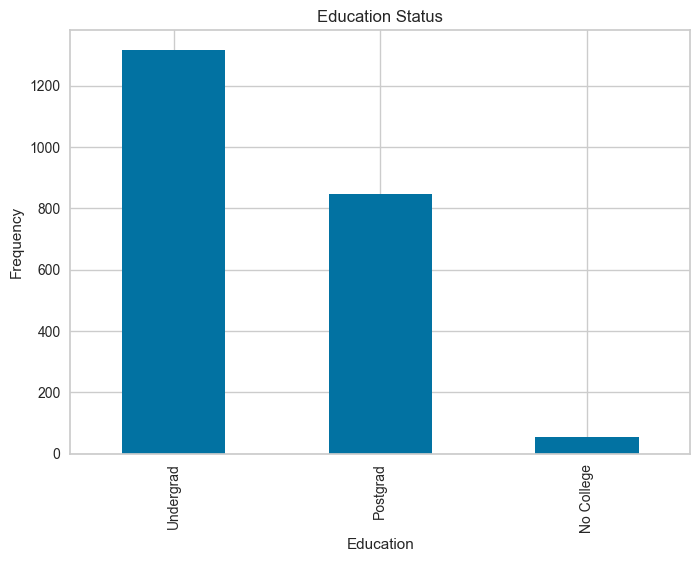

In [596]:
df['Education'].value_counts().plot(kind='bar', title='Education Status')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

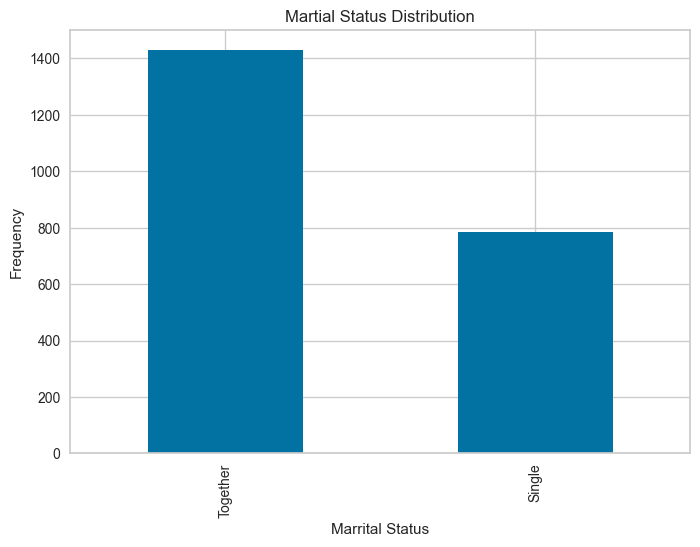

In [597]:
df['Marital_Status'].value_counts().plot(kind='bar', title='Martial Status Distribution')
plt.xlabel('Marrital Status')
plt.ylabel('Frequency')
plt.show()

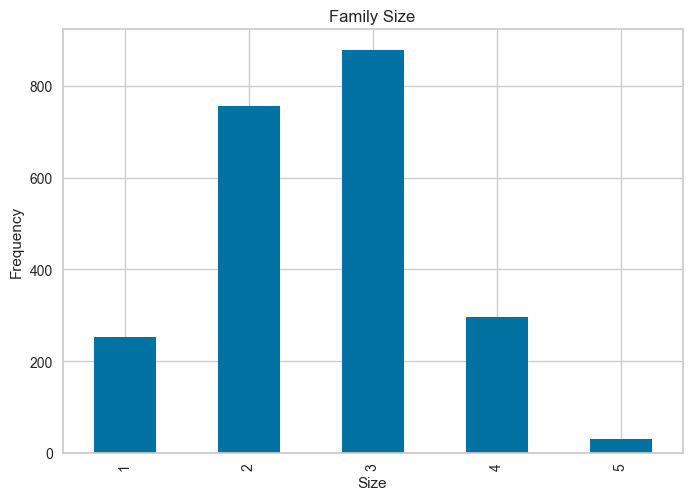

In [598]:
df['Family_Size'].value_counts().sort_index().plot(kind='bar', title='Family Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

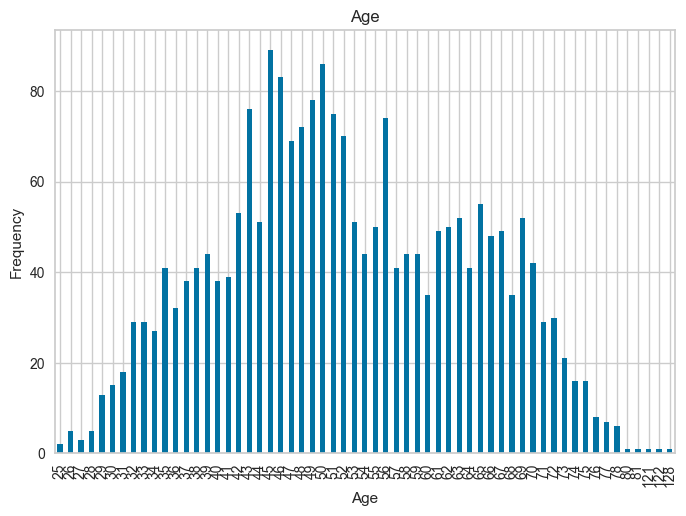

In [599]:
df['Age'].value_counts().sort_index().plot(kind='bar', title='Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Realizing I should one hot encode features like marital status and education 
<br>
Reason being is because this data isn't ordinal meaning ordering matters... For this reason, since ordering of education or marital status doesn't matter, it's probably best that I create additional features to build out the one hot encoding

In [600]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Children_Count,Family_Size,Total_Spent
0,5524,1957,Undergrad,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,3041,64,0,1,1617
1,2174,1954,Undergrad,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,2491,67,2,3,27
2,4141,1965,Undergrad,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,2690,56,0,2,776
3,6182,1984,Undergrad,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,2517,37,1,3,53
4,5324,1981,Postgrad,Together,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,2539,40,1,3,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergrad,Together,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,2759,54,1,3,1341
2236,4001,1946,Postgrad,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,2397,75,3,5,444
2237,7270,1981,Undergrad,Single,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,2533,40,0,1,1241
2238,8235,1956,Postgrad,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,2534,65,1,3,843


In [601]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
object_cols = ['Education', 'Marital_Status']
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [602]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Children_Count,Family_Size,Total_Spent
0,5524,1957,2,0,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,3041,64,0,1,1617
1,2174,1954,2,0,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,2491,67,2,3,27
2,4141,1965,2,1,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,2690,56,0,2,776
3,6182,1984,2,1,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,2517,37,1,3,53
4,5324,1981,1,1,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,2539,40,1,3,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,1,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,2759,54,1,3,1341
2236,4001,1946,1,1,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,2397,75,3,5,444
2237,7270,1981,2,0,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,2533,40,0,1,1241
2238,8235,1956,1,1,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,2534,65,1,3,843


In [603]:
# # One-Hot Encoding - fucking everything up
# df = pd.get_dummies(df, columns=['Education', 'Marital_Status'])
# df

Standardization - useful when data is evenly distributed<br>
stdev = 1 and mean = 0<br>

In [604]:
# scaled_df = df[['Income', 'Age', 'Family_Size', 'Total_Spent', 'Complain', 'Education_No College', 'Education_Postgrad', 'Education_Undergrad']]
cols_del = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID", 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(cols_del, axis=1)
# dataframe = df
scaled_df = df.copy()
scaled_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meats,Fish,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Children_Count,Family_Size,Total_Spent
0,2,0,58138.0,0,0,58,635,88,546,172,...,3,8,10,4,7,3041,64,0,1,1617
1,2,0,46344.0,1,1,38,11,1,6,2,...,2,1,1,2,5,2491,67,2,3,27
2,2,1,71613.0,0,0,26,426,49,127,111,...,1,8,2,10,4,2690,56,0,2,776
3,2,1,26646.0,1,0,26,11,4,20,10,...,2,2,0,4,6,2517,37,1,3,53
4,1,1,58293.0,1,0,94,173,43,118,46,...,5,5,3,6,5,2539,40,1,3,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1,61223.0,0,1,46,709,43,182,42,...,2,9,3,4,5,2759,54,1,3,1341
2236,1,1,64014.0,2,1,56,406,0,30,0,...,7,8,2,5,7,2397,75,3,5,444
2237,2,0,56981.0,0,0,91,908,48,217,32,...,1,2,3,13,6,2533,40,0,1,1241
2238,1,1,69245.0,0,1,8,428,30,214,80,...,2,6,5,10,3,2534,65,1,3,843


In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2215 non-null   int64  
 1   Marital_Status       2215 non-null   int64  
 2   Income               2215 non-null   float64
 3   Kidhome              2215 non-null   int64  
 4   Teenhome             2215 non-null   int64  
 5   Recency              2215 non-null   int64  
 6   Wines                2215 non-null   int64  
 7   Fruits               2215 non-null   int64  
 8   Meats                2215 non-null   int64  
 9   Fish                 2215 non-null   int64  
 10  Sweets               2215 non-null   int64  
 11  Gold                 2215 non-null   int64  
 12  NumDealsPurchases    2215 non-null   int64  
 13  NumWebPurchases      2215 non-null   int64  
 14  NumCatalogPurchases  2215 non-null   int64  
 15  NumStorePurchases    2215 non-null   int64 

In [606]:
# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to all numerical columns
# Convert booleans to int
col_to_convert = scaled_df.columns[scaled_df.dtypes == 'bool']
scaled_df[col_to_convert] = scaled_df[col_to_convert].astype(int)

# Select numerical columns
numerical_cols = scaled_df.select_dtypes(include=['float64', 'int64']).columns

# Fit and transform the data
scaled_df[numerical_cols] = scaler.fit_transform(scaled_df[numerical_cols])
scaled_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meats,Fish,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Children_Count,Family_Size,Total_Spent
0,0.794390,-1.348357,0.286604,-0.822585,-0.929363,0.310113,0.977779,1.548973,1.689714,2.453932,...,0.352088,1.428103,2.504074,-0.554500,0.693215,1.528882,0.986016,-1.264487,-1.758153,1.675011
1,0.794390,-1.348357,-0.261407,1.040427,0.908618,-0.380899,-0.872375,-0.637338,-0.718196,-0.651178,...,-0.167829,-1.125846,-0.571253,-1.169839,-0.131420,-1.188066,1.236344,1.405522,0.450131,-0.962727
2,0.794390,0.741643,0.912723,-0.822585,-0.929363,-0.795506,0.358096,0.568903,-0.178646,1.339745,...,-0.687745,1.428103,-0.229550,1.291518,-0.543738,-0.205025,0.318476,-1.264487,-0.654011,0.279830
3,0.794390,0.741643,-1.176680,1.040427,-0.929363,-0.795506,-0.872375,-0.561948,-0.655768,-0.505056,...,-0.167829,-0.760996,-0.912956,-0.554500,0.280897,-1.059629,-1.266933,0.070517,0.450131,-0.919594
4,-1.050026,0.741643,0.293806,1.040427,-0.929363,1.553934,-0.392047,0.418123,-0.218777,0.152497,...,1.391921,0.333553,0.112153,0.060839,-0.131420,-0.950951,-1.016605,0.070517,0.450131,-0.307440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.794390,0.741643,0.429949,-0.822585,0.908618,-0.104494,1.197188,0.418123,0.066605,0.079436,...,-0.167829,1.792953,0.112153,-0.554500,-0.131420,0.135828,0.151590,0.070517,0.450131,1.217140
2236,-1.050026,0.741643,0.559634,2.903439,0.908618,0.241012,0.298796,-0.662468,-0.611177,-0.687709,...,2.431754,1.428103,-0.229550,-0.246830,0.693215,-1.652417,1.903884,2.740526,2.658415,-0.270943
2237,0.794390,-1.348357,0.232844,-0.822585,-0.929363,1.450282,1.787221,0.543773,0.222673,-0.103218,...,-0.687745,-0.760996,0.112153,2.214527,0.280897,-0.980590,-1.016605,-1.264487,-1.758153,1.051244
2238,-1.050026,0.741643,0.802694,-0.822585,0.908618,-1.417416,0.364026,0.091432,0.209295,0.773519,...,-0.167829,0.698403,0.795559,1.291518,-0.956055,-0.975650,1.069458,0.070517,0.450131,0.390980


# PCA, Feature Selection

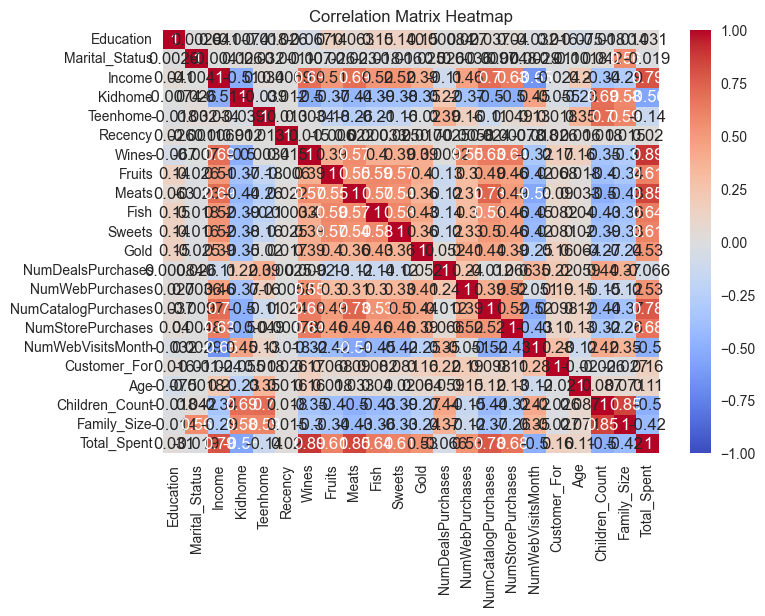

In [607]:
#correlation matrix
corrmat= scaled_df.corr()
sns.heatmap(corrmat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [608]:
pca = PCA(n_components=3)  # Reduce to 2D for visualization
pca_components = pca.fit_transform(scaled_df)

# Create a DataFrame for easy plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])
pca_df.describe()

,PC1,PC2,PC3
count,2.215000e+03,2.215000e+03,2.215000e+03
mean,-2.053035e-16,3.207868e-17,6.014752e-17
std,2.800156e+00,1.631314e+00,1.233295e+00
min,-5.919796e+00,-3.820868e+00,-3.499025e+00
25%,-2.484833e+00,-1.275753e+00,-8.231095e-01
50%,-7.527808e-01,-1.745437e-01,-4.638162e-02
75%,2.424753e+00,1.154485e+00,8.700340e-01
max,7.284509e+00,6.390765e+00,6.780533e+00


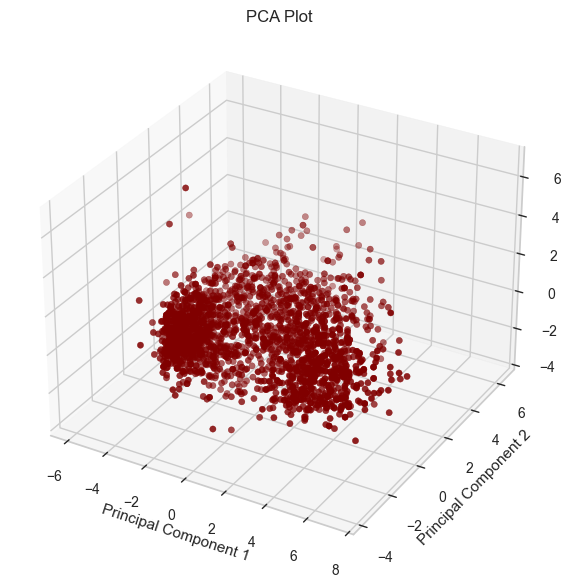

In [609]:
#A 3D Projection Of Data In The Reduced Dimension
x =pca_df["PC1"]
y =pca_df["PC2"]
z =pca_df["PC3"]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Clustering

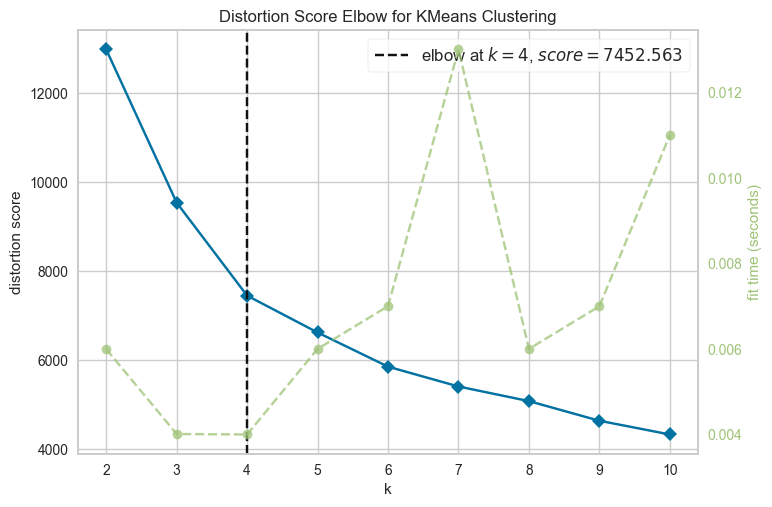

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [610]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_df)
Elbow_M.show()

In [611]:
optimal_k = 4  # For example
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_df)

pca_df['KM_Cluster'] = clusters
df['KM_Cluster'] = clusters

ac = AgglomerativeClustering(n_clusters=optimal_k)
clusters = ac.fit_predict(pca_df)

pca_df['AC_Cluster'] = clusters
df['AC_Cluster'] = clusters
pca_df

,PC1,PC2,PC3,KM_Cluster,AC_Cluster
0,4.730879,-0.250530,2.515072,2,3
1,-2.804290,0.025794,-1.492582,3,1
2,2.276340,-0.565870,-0.185153,2,3
3,-2.628472,-1.483453,-0.190745,0,2
4,-0.527223,0.091172,-0.110088,3,1
...,...,...,...,...,...
2210,2.625345,2.015297,0.656399,1,0
2211,-2.906967,4.369758,-1.485648,3,1
2212,2.292700,-1.823030,0.542648,2,3
2213,1.720893,1.379657,-1.915159,1,0


In [612]:
silhouette_avg = silhouette_score(scaled_df, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.14


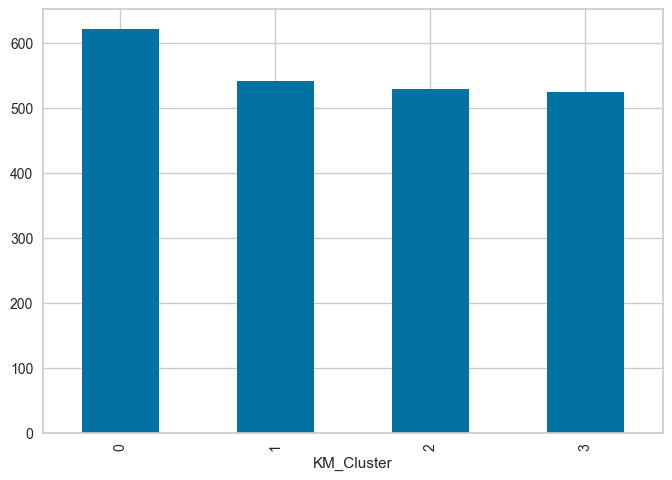

In [613]:
pca_df['KM_Cluster'].value_counts().sort_index().plot(kind='bar')
plt.show()

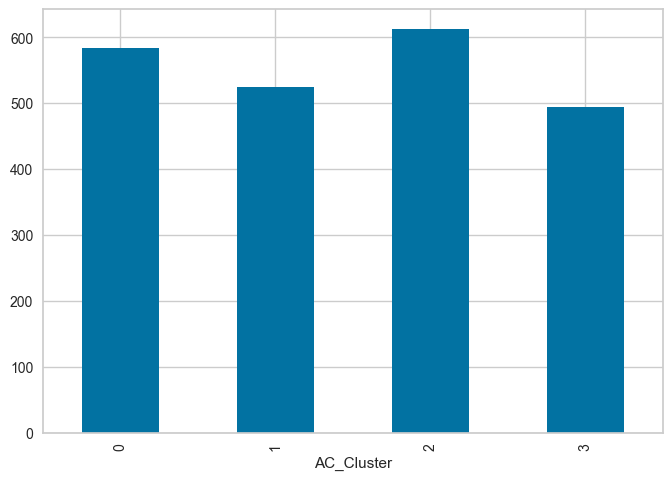

In [614]:
pca_df['AC_Cluster'].value_counts().sort_index().plot(kind='bar')
plt.show()

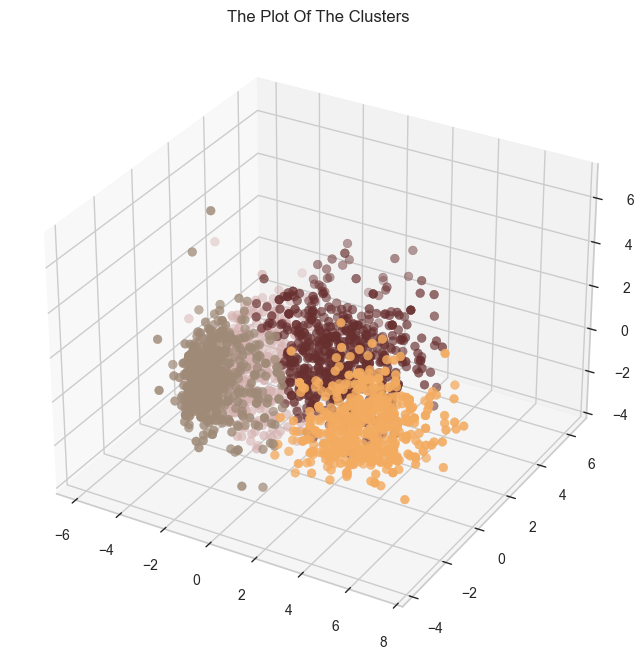

In [615]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_df["AC_Cluster"], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

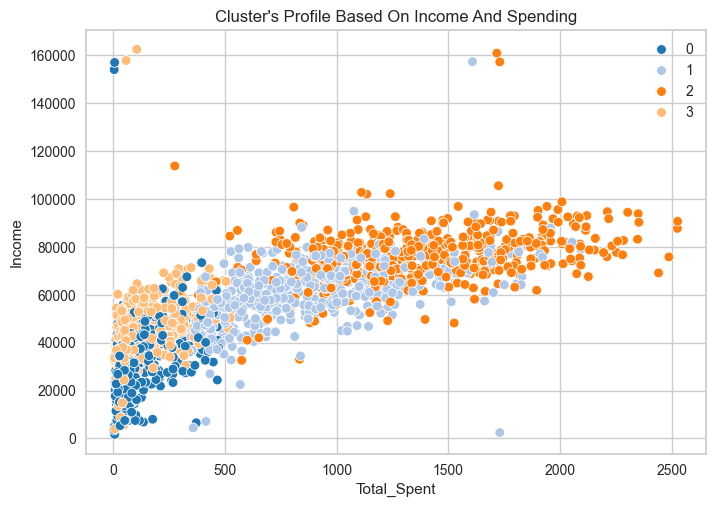

In [616]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

pal = sns.color_palette('tab20', optimal_k)  # Another option

pl = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"],hue=df["KM_Cluster"], palette=pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

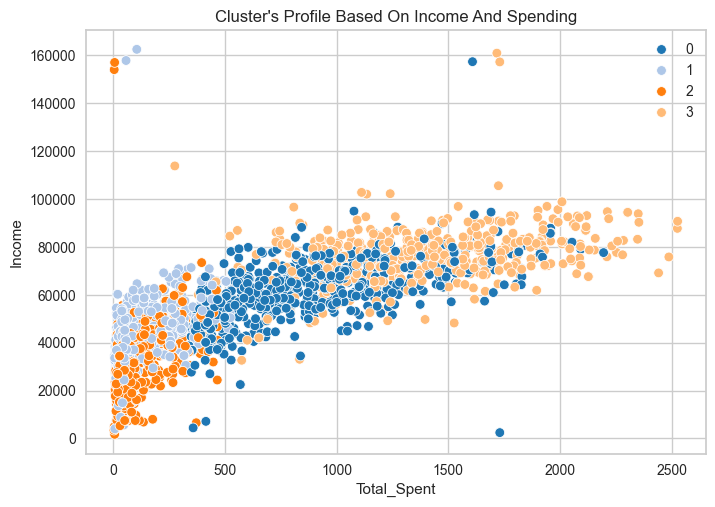

In [617]:
pal = ["#682F2F","#F3AB60", "#9F8A78","#B9C0C9"]

pal = sns.color_palette('tab20', optimal_k)  # Another option

pl = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"],hue=df["AC_Cluster"], palette=pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

# Done so far
Used almost all features and let PCA shrink the number of features down for us.
